<h2> Data </h2>

In [1]:
from scipy.stats import ttest_ind, chisquare, normaltest, ttest_1samp

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Create dataFrame from out data file (csv)
df = pd.read_csv("./nfl-scores-and-betting-data/spreadspoke_scores.csv")
# Drop columns with information we don't need
df = df.drop(columns=["schedule_season", "schedule_week", "schedule_playoff", "stadium_neutral", "team_favorite_id", "spread_favorite", "over_under_line"],axis=1)
# Drop games where stadium was closed
df = df[df.weather_detail != "DOME"]

# Indicate whether home team lost or won.
# BUGGY using elif for considering TIES, for now TIES are LOSSES
for index, row in df.iterrows():
    score_home = df.loc[index]['score_home']
    score_away = df.loc[index]['score_away']
    if score_home > score_away:
        df.at[index, 'home_w_l_t'] = 'WIN'
    elif score_away > score_home:
         df.at[index, 'home_w_l_t'] = 'LOSS'
    else:
        df.at[index, 'home_w_l_t'] = 'TIE'

# Print out dataFrame
df

,schedule_date,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,home_w_l_t
0,09/02/1966,Miami Dolphins,14,23,Oakland Raiders,Orange Bowl,83.0,6.0,71,NaN,LOSS
1,09/03/1966,Houston Oilers,45,7,Denver Broncos,Rice Stadium,81.0,7.0,70,NaN,WIN
2,09/04/1966,San Diego Chargers,27,7,Buffalo Bills,Balboa Stadium,70.0,7.0,82,NaN,WIN
3,09/09/1966,Miami Dolphins,14,19,New York Jets,Orange Bowl,82.0,11.0,78,NaN,LOSS
4,09/10/1966,Green Bay Packers,24,3,Baltimore Colts,Lambeau Field,64.0,8.0,62,NaN,WIN
5,09/10/1966,Houston Oilers,31,0,Oakland Raiders,Rice Stadium,77.0,6.0,82,NaN,WIN
6,09/10/1966,San Diego Chargers,24,0,New England Patriots,Balboa Stadium,69.0,9.0,81,NaN,WIN
7,09/11/1966,Atlanta Falcons,14,19,Los Angeles Rams,Atlanta-Fulton County Stadium,71.0,7.0,57,NaN,LOSS
8,09/11/1966,Buffalo Bills,20,42,Kansas City Chiefs,War Memorial Stadium,63.0,11.0,73,NaN,LOSS
9,09/11/1966,Detroit Lions,14,3,Chicago Bears,Tiger Stadium,67.0,7.0,73,NaN,WIN


In [3]:
# lets see what would happen if we drop the rows with null values
rows_to_drop = df[df.isnull().any(axis=1)]
rows_to_drop

,schedule_date,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,home_w_l_t
0,09/02/1966,Miami Dolphins,14,23,Oakland Raiders,Orange Bowl,83.0,6.0,71,NaN,LOSS
1,09/03/1966,Houston Oilers,45,7,Denver Broncos,Rice Stadium,81.0,7.0,70,NaN,WIN
2,09/04/1966,San Diego Chargers,27,7,Buffalo Bills,Balboa Stadium,70.0,7.0,82,NaN,WIN
3,09/09/1966,Miami Dolphins,14,19,New York Jets,Orange Bowl,82.0,11.0,78,NaN,LOSS
4,09/10/1966,Green Bay Packers,24,3,Baltimore Colts,Lambeau Field,64.0,8.0,62,NaN,WIN
5,09/10/1966,Houston Oilers,31,0,Oakland Raiders,Rice Stadium,77.0,6.0,82,NaN,WIN
6,09/10/1966,San Diego Chargers,24,0,New England Patriots,Balboa Stadium,69.0,9.0,81,NaN,WIN
7,09/11/1966,Atlanta Falcons,14,19,Los Angeles Rams,Atlanta-Fulton County Stadium,71.0,7.0,57,NaN,LOSS
8,09/11/1966,Buffalo Bills,20,42,Kansas City Chiefs,War Memorial Stadium,63.0,11.0,73,NaN,LOSS
9,09/11/1966,Detroit Lions,14,3,Chicago Bears,Tiger Stadium,67.0,7.0,73,NaN,WIN


In [4]:
# lmao I guess we cant drop them then. 
# It would appear that most entries are missing weather_detail column some are missing weather_humidity
# now lets check how many entries are missing weather_humidity
df.dropna(subset=["weather_humidity"], inplace = True)
df

,schedule_date,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,home_w_l_t
0,09/02/1966,Miami Dolphins,14,23,Oakland Raiders,Orange Bowl,83.0,6.0,71,NaN,LOSS
1,09/03/1966,Houston Oilers,45,7,Denver Broncos,Rice Stadium,81.0,7.0,70,NaN,WIN
2,09/04/1966,San Diego Chargers,27,7,Buffalo Bills,Balboa Stadium,70.0,7.0,82,NaN,WIN
3,09/09/1966,Miami Dolphins,14,19,New York Jets,Orange Bowl,82.0,11.0,78,NaN,LOSS
4,09/10/1966,Green Bay Packers,24,3,Baltimore Colts,Lambeau Field,64.0,8.0,62,NaN,WIN
5,09/10/1966,Houston Oilers,31,0,Oakland Raiders,Rice Stadium,77.0,6.0,82,NaN,WIN
6,09/10/1966,San Diego Chargers,24,0,New England Patriots,Balboa Stadium,69.0,9.0,81,NaN,WIN
7,09/11/1966,Atlanta Falcons,14,19,Los Angeles Rams,Atlanta-Fulton County Stadium,71.0,7.0,57,NaN,LOSS
8,09/11/1966,Buffalo Bills,20,42,Kansas City Chiefs,War Memorial Stadium,63.0,11.0,73,NaN,LOSS
9,09/11/1966,Detroit Lions,14,3,Chicago Bears,Tiger Stadium,67.0,7.0,73,NaN,WIN


In [5]:
# here we can see we still have 8388 entries left, so let's keep this newly modified dataframe
# due to the massive missing data in weather_detail, it is better to analyze our data to check 
# if there exists an relation between temperature/wind speed and the game outcome

In [6]:
# here I'll gather the temperature and wind speed data separately
# 3 temp data for: WIN, TIE, LOSS, 3 wind data for: WIN, TIE, LOSS
# my goal is to graph these datas and compare the graphs with one another
# to see whether there is a clear connection between game result and
# game temperature/game wind_mph

temp_win = []
temp_tie = []
temp_loss = []
wind_win = []
wind_tie = []
wind_loss = []

for index, row in df.iterrows():
    if row["home_w_l_t"] == "WIN":
        temp_win.append(row["weather_temperature"])
        wind_win.append(row["weather_wind_mph"])
    elif row["home_w_l_t"] == "TIE":
        temp_tie.append(row["weather_temperature"])
        wind_tie.append(row["weather_wind_mph"])
    else:
        temp_loss.append(row["weather_temperature"])
        wind_loss.append(row["weather_wind_mph"])

In [73]:
temp_win[:10]

[81.0, 70.0, 64.0, 77.0, 69.0, 67.0, 72.0, 72.0, 61.0, 72.0]

In [74]:
temp_loss[:10]

[83.0, 82.0, 71.0, 63.0, 65.0, 62.0, 59.0, 60.0, 65.0, 55.0]

In [76]:
temp_tie[:10]

[64.0, 60.0, 53.0, 44.0, 38.0, 34.0, 69.0, 67.0, 55.0, 63.0]

(array([  13.,   35.,  109.,  336.,  699.,  967., 1143.,  973.,  503.,
          84.]),
 array([-5. ,  4.7, 14.4, 24.1, 33.8, 43.5, 53.2, 62.9, 72.6, 82.3, 92. ]),
 <a list of 10 Patch objects>)

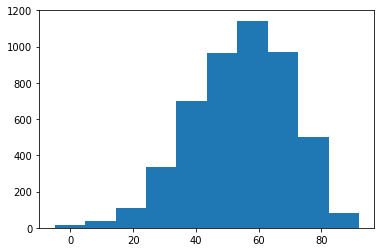

In [10]:
# here is the histogram for the temperatures
# temp_win histogram
plt.hist(df[df["home_w_l_t"] == "WIN"]["weather_temperature"])

(array([ 2.,  4., 10.,  7.,  7., 17., 12.,  6.,  3.,  2.]),
 array([20. , 26.2, 32.4, 38.6, 44.8, 51. , 57.2, 63.4, 69.6, 75.8, 82. ]),
 <a list of 10 Patch objects>)

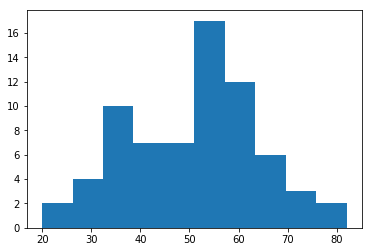

In [11]:
# temp_tie histogram
plt.hist(df[df["home_w_l_t"] == "TIE"]["weather_temperature"])

(array([  7.,  24., 101., 287., 559., 758., 817., 581., 288.,  34.]),
 array([-2. ,  7.7, 17.4, 27.1, 36.8, 46.5, 56.2, 65.9, 75.6, 85.3, 95. ]),
 <a list of 10 Patch objects>)

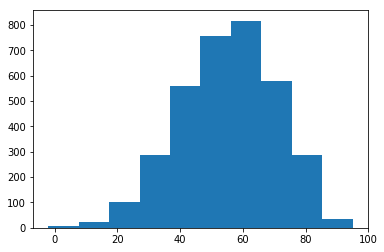

In [12]:
# temp_loss histogram
plt.hist(df[df["home_w_l_t"] == "LOSS"]["weather_temperature"])

In [ ]:
# based off the temp_WIN/temp_Loss histogram, it does not seem the game temperature
# plays a huge role in the outcome of the game. Both histogram look identical. 
# It is safe to ignore the tie graph since there are not many data entries that end in a tie. 

(array([ 143.,  722., 1438., 1283.,  681.,  371.,  144.,   56.,   22.,
           2.]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <a list of 10 Patch objects>)

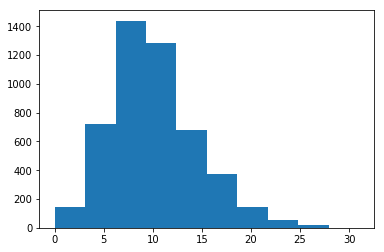

In [13]:
# histograms for wind_speeds
# wind_win histogram
plt.hist(df[df["home_w_l_t"] == "WIN"]["weather_wind_mph"])

(array([ 9.,  8., 19., 15., 10.,  4.,  3.,  0.,  1.,  1.]),
 array([ 4. ,  6.1,  8.2, 10.3, 12.4, 14.5, 16.6, 18.7, 20.8, 22.9, 25. ]),
 <a list of 10 Patch objects>)

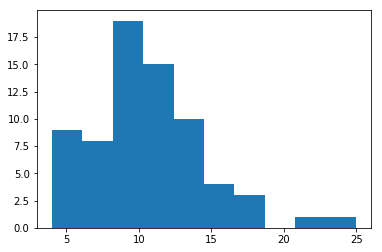

In [14]:
# wind_tie histogram
plt.hist(df[df["home_w_l_t"] == "TIE"]["weather_wind_mph"])

(array([ 128.,  522., 1033.,  896.,  498.,  263.,   81.,   22.,    8.,
           5.]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <a list of 10 Patch objects>)

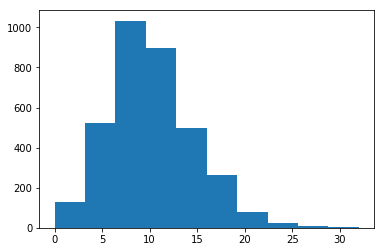

In [15]:
# wind_loss histogram
plt.hist(df[df["home_w_l_t"] == "LOSS"]["weather_wind_mph"])

In [ ]:
# similar case for the game_wind_mph histograms. WIN/LOSS histograms are identical.
# Just by looking at the graphs, it seems both game temperature and game windspeed
# would have very little impact on the outcome of the game.
# however, I am not ready to give up on it yet.
# To further our analysis, we will use t-test to check for the difference between temp_win and temp_loss

In [16]:
# A t-test to check if there is any statistically significant difference between temp_win and temp_loss.
t_val_weather, p_val_weather = ttest_ind(temp_win, temp_loss)

In [17]:
# Indeed there is a statistically significant difference, as the p-value is very small.
t_val_weather, p_val_weather

(-2.741049044299961, 0.006137419103358492)

In [18]:
# A t-test to check if there is any statistically significant difference between wind_win and wind_loss.
t_val_wind, p_val_wind = ttest_ind(wind_win, wind_loss)

In [19]:
# The t-test does not yield a small p-value, so we cannot conclude that there is a statistically significant difference.
t_val_wind, p_val_wind

(1.4349573206864878, 0.15133686599379564)

In [ ]:
# So starting from this point on, we will ignore game wind_speed since the difference between wind_win and wind_loss is not 
# significant

In [20]:
# here we will create 3 new columns ['avg_temperature', 'std_temperature', 'z_score_temperature']
# and save the corresponding values for future analysis if these info are needed.
# Make a copy of df
df1 = df.copy()

In [21]:
# We compute the average temperature of all the games won by each team.
# The averages are saved as a new column 'avg_temperature'
df1['avg_temperature'] = df1.groupby(['team_home', 'home_w_l_t'])['weather_temperature'].transform(np.mean)

In [22]:
# Then we compute the standard deviation of temperature of all the games won by each team.
# The standard deviations are saved as a new column 'std_temperature'
df1['std_temperature'] = df1.groupby(['team_home', 'home_w_l_t'])['weather_temperature'].transform(np.std)

In [23]:
# With average and standard deviation of each group already computed, we can proceed to compute the z-score.
# The z-scores are saved as a new column 'z_score_temperature'
df1['z_score_temperature'] = (df1['weather_temperature'] - df1['avg_temperature']) / df1['std_temperature']

In [24]:
# check the new dataframe
df1.head()

,schedule_date,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,home_w_l_t,avg_temperature,std_temperature,z_score_temperature
0,09/02/1966,Miami Dolphins,14,23,Oakland Raiders,Orange Bowl,83.0,6.0,71,NaN,LOSS,76.254386,6.995335,0.964302
1,09/03/1966,Houston Oilers,45,7,Denver Broncos,Rice Stadium,81.0,7.0,70,NaN,WIN,79.000000,2.828427,0.707107
2,09/04/1966,San Diego Chargers,27,7,Buffalo Bills,Balboa Stadium,70.0,7.0,82,NaN,WIN,63.828877,7.095555,0.869717
3,09/09/1966,Miami Dolphins,14,19,New York Jets,Orange Bowl,82.0,11.0,78,NaN,LOSS,76.254386,6.995335,0.821349
4,09/10/1966,Green Bay Packers,24,3,Baltimore Colts,Lambeau Field,64.0,8.0,62,NaN,WIN,42.695652,16.134627,1.320412


In [41]:
# For this part of our analysis, we want to find out whether the average winning temperature of each team
# plays an role in the outcome of a game.
# To do this, we will have to get the average winning temperature for each team. 
# First we iterate through each entry of the dataframe, get the game temperature
# and save it as the value under the winning team of the game
winning_temps = {}
for index, row in df.iterrows():
    # only counting the winning temperature
    if row["home_w_l_t"] == "WIN":
        if row["team_home"] in winning_temps:
            winning_temps[row["team_home"]].append(row["weather_temperature"])
        else:
            winning_temps[row["team_home"]] = [row["weather_temperature"]]
    elif row["home_w_l_t"] == "LOSS":
        if row["team_away"] in winning_temps:
            winning_temps[row["team_away"]].append(row["weather_temperature"])
        else:
            winning_temps[row["team_away"]] = [row["weather_temperature"]]

# Now we loop through all teams in our winning_temps dictionary, and calculate the average winning 
# temperature of each team and save it in avg_winning_temp
avg_winning_temp = {}
for team in winning_temps.keys():
    total = 0
    for temp in winning_temps[team]:
        total += temp
    avg_winning_temp[team] = total / len(winning_temps[team])

In [81]:
# check avg_winning_temp
avg_winning_temp

{'Oakland Raiders': 56.56956521739131,
 'Houston Oilers': 53.23529411764706,
 'San Diego Chargers': 60.59726962457338,
 'New York Jets': 55.089928057553955,
 'Green Bay Packers': 45.914956011730204,
 'Los Angeles Rams': 59.41125541125541,
 'Kansas City Chiefs': 52.31683168316832,
 'Detroit Lions': 51.16935483870968,
 'St. Louis Cardinals': 52.07971014492754,
 'Cleveland Browns': 50.10294117647059,
 'Buffalo Bills': 50.810344827586206,
 'Dallas Cowboys': 58.382716049382715,
 'New England Patriots': 51.98776758409786,
 'Baltimore Colts': 51.45454545454545,
 'Philadelphia Eagles': 53.578947368421055,
 'Pittsburgh Steelers': 49.101736972704714,
 'Washington Redskins': 54.40112994350282,
 'Denver Broncos': 51.367123287671234,
 'Chicago Bears': 50.2952380952381,
 'San Francisco 49ers': 56.6875,
 'Minnesota Vikings': 48.49767441860465,
 'New York Giants': 54.10248447204969,
 'Boston Patriots': 46.5,
 'Atlanta Falcons': 57.02840909090909,
 'New Orleans Saints': 58.419117647058826,
 'Cincinnati

In [82]:
# check the length of our dictionary
len(avg_winning_temp)

40

In [44]:
# this could be a problem since there are 40+ teams but only 40 teams have winning records
# for now I will assume the teams not in the list to lose 100% of the time

# function used to predict the outcome of a game based on each team's avg_winning_temp
# here we pass in the home_team name, away_team name, and the game temperature
# return True if game temperature is closer to home_team's avg_winning temperature
# False if otherwise, note that I assume if two teams are equally close to the winning temperature
# home_team should win due to home game advantage
def prediction(home_team, away_team, game_temp):
    home_diff = abs(avg_winning_temp[home_team] - game_temp)
    away_diff = abs(avg_winning_temp[away_team] - game_temp)
    if home_diff <= away_diff:
        return "WIN"
    else:
        return "LOSS"
    

In [45]:
# now let's do some tests
df.head()

,schedule_date,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,home_w_l_t
0,09/02/1966,Miami Dolphins,14,23,Oakland Raiders,Orange Bowl,83.0,6.0,71,NaN,LOSS
1,09/03/1966,Houston Oilers,45,7,Denver Broncos,Rice Stadium,81.0,7.0,70,NaN,WIN
2,09/04/1966,San Diego Chargers,27,7,Buffalo Bills,Balboa Stadium,70.0,7.0,82,NaN,WIN
3,09/09/1966,Miami Dolphins,14,19,New York Jets,Orange Bowl,82.0,11.0,78,NaN,LOSS
4,09/10/1966,Green Bay Packers,24,3,Baltimore Colts,Lambeau Field,64.0,8.0,62,NaN,WIN


In [46]:
# pick game 0, Miami Dolphins vs Oakland Raiders, the actual result is loss
home_team = "Miami Dolphins"
away_team = "Oakland Raiders"
game_temp = 83.0
result = prediction(home_team, away_team, game_temp)
if result == "WIN":
    print("Home team wins")
else:
    print("Home team loses")

Home team wins


In [47]:
# well, the first test shows opposite result of the actual result
# let's loop through all games in our data frame and check the accuracy of this method
correct_count = 0
for index, row in df.iterrows():
    home_team = row["team_home"]
    away_team = row["team_away"]
    game_temp = row["weather_temperature"]
    if prediction(home_team, away_team, game_temp) == row["home_w_l_t"]:
        correct_count += 1
accuracy = correct_count / len(df)
print(accuracy)

0.515855984740105


In [48]:
# This method only has a 51% accuracy
# a random result generator would give around 50% accuracy, so this approach does not seem
# to indicate average winning temperature and game result are related in anyway

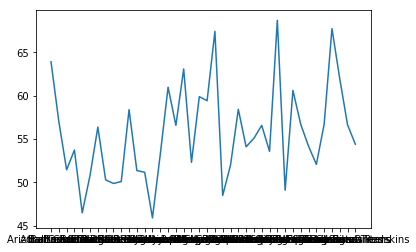

In [49]:
# plot the avg_winning_temp
lists = sorted(avg_winning_temp.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [68]:
# For this part of our analysis, we will test if the overal win/loss record of each team
# determines the game result. Note that after we cleaned the dataframe, we are left with
# close to 9000 data entries, but we have 40+ teams so this implies majority of the teams
# on our record did not play every other team in the league. This would generate a huge 
# hole in our prediction method. To counter this, we would calculate the the overall win
# rate of each team and use this data for our prediction when we run into the case where 
# the two teams have no prior game record.

# here I will use a nested dictionary
# here I will also create a overall win count and total gams played count for each team
import collections 
win_ratio = {}
win_count = {}
team_list = set()
for index, row in df.iterrows():
    team_list.add(row["team_home"])
    team_list.add(row["team_away"])
total_count = collections.Counter(team_list)
for index, row in df.iterrows():
    team_won = team_lost = ""
    if row["home_w_l_t"] == "WIN":
        team_won = row["team_home"]
        team_lost = row["team_away"]
    elif row["home_w_l_t"] == "LOSS":
        team_won = row["team_away"]
        team_lost = row["team_home"]

    if team_won in win_ratio:
        if team_lost in win_ratio[team_won]:
            win_ratio[team_won][team_lost] += 1
        else:
            win_ratio[team_won][team_lost] = 0
    else:
        win_ratio[team_won] = {team_lost: 0}
    if team_won in win_count:
        win_count[team_won] += 1
    else:
        win_count[team_won] = 1
    total_count[team_won] += 1
    total_count[team_lost] += 1
    

In [88]:
# here we display our win_ratio dictionary
for x in list(win_ratio)[0:3]:
    print (x + ": " + str(win_ratio[x]))

Oakland Raiders: {'Miami Dolphins': 9, 'Boston Patriots': 0, 'Denver Broncos': 24, 'Washington Redskins': 4, 'Pittsburgh Steelers': 12, 'Cleveland Browns': 8, 'San Diego Chargers': 29, 'New York Jets': 9, 'Kansas City Chiefs': 27, 'Philadelphia Eagles': 4, 'Cincinnati Bengals': 10, 'Houston Oilers': 2, 'Green Bay Packers': 2, 'Buffalo Bills': 5, 'Los Angeles Rams': 1, 'Chicago Bears': 4, 'St. Louis Cardinals': 0, 'Baltimore Colts': 2, 'New York Giants': 4, 'San Francisco 49ers': 2, 'Detroit Lions': 2, 'New England Patriots': 3, 'Dallas Cowboys': 3, 'New Orleans Saints': 0, 'Atlanta Falcons': 2, 'Tampa Bay Buccaneers': 4, 'Minnesota Vikings': 4, 'Seattle Seahawks': 9, 'Indianapolis Colts': 0, 'Jacksonville Jaguars': 2, 'St. Louis Rams': 1, 'Arizona Cardinals': 2, 'Carolina Panthers': 1, 'Tennessee Titans': 2, 'Baltimore Ravens': 0, 'Houston Texans': 1}
Houston Oilers: {'Denver Broncos': 1, 'Oakland Raiders': 1, 'Pittsburgh Steelers': 6, 'Cincinnati Bengals': 9, 'Buffalo Bills': 3, 'Balt

In [70]:
# now let's make a function that takes two teams, and predict the result base on win_ratio 
# if two teams never played with one another, we will use the overall win rate of each team 
# and assume the team with higher overall win rate would win the game
def predictWinRatio(team1, team2):
    if team1 in win_ratio and team2 in win_ratio:
            if team2 in win_ratio[team1]:
                # here we will have to take care of the equal case later, I just include it here
                if win_ratio[team1][team2] >= win_ratio[team2][team1]:
                    return team1
                else:
                    return team2
            else:
                return team1 if win_count[team1] / total_count[team1] >= win_count[team2] / total_count[team2] else team2
    else:
        if team1 not in win_ratio:
            print("team1 not in win_ratio")
        if team2 not in win_ratio:
            print("team2 not in win_ratio")
                

In [71]:
correct_count = 0
for index, row in df.iterrows():
    team_won = team_lost = ""
    if row["home_w_l_t"] == "WIN":
        team_won = row["team_home"]
        tem_lost = row["team_away"]
    elif row["home_w_l_t"] == "LOSS":
        team_won = row["team_away"]
        tem_lost = row["team_home"]
    if predictWinRatio(team_won, team_lost) == team_won:
        correct_count += 1
accuracy = correct_count / len(df)
print(accuracy)
    

0.5927515498330949


In [ ]:
# Here we can see the accuracy increased from 51% to 59%
# This indicates that previous game record along
# with overall win rate of each team does influence
# the outcome of the game. Unlike the game temperature
# which we found to have very little effect on the outcome